In [70]:
#import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
df=pd.read_csv("Fraud_Loan_Prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [72]:
df.shape

(614, 13)

In [73]:
#Checking if there are any null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

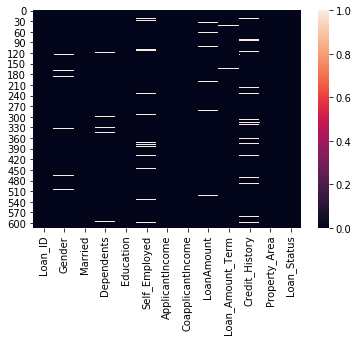

In [74]:
sns.heatmap(df.isnull())

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [76]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [77]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


(array([1, 2, 3, 4, 5]), <a list of 5 Text xticklabel objects>)

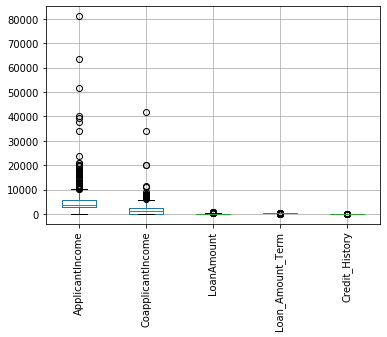

In [78]:
df.boxplot()
plt.xticks(rotation=90)

In [79]:
for i in df.columns:
    print(df[i].value_counts())
    print("")

LP001532    1
LP001682    1
LP002226    1
LP002211    1
LP002772    1
           ..
LP002536    1
LP001194    1
LP002390    1
LP001577    1
LP001319    1
Name: Loan_ID, Length: 614, dtype: int64

Male      489
Female    112
Name: Gender, dtype: int64

Yes    398
No     213
Name: Married, dtype: int64

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

No     500
Yes     82
Name: Self_Employed, dtype: int64

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1

In [80]:
df['CoapplicantIncome']=df['CoapplicantIncome'].replace(0,np.NaN)

In [81]:
# Fiiling The Missing Values
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())
df['CoapplicantIncome']=df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean())

df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [82]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,2919.193314,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,2919.193314,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,2919.193314,141.000000,360.0,1.0,Urban,Y


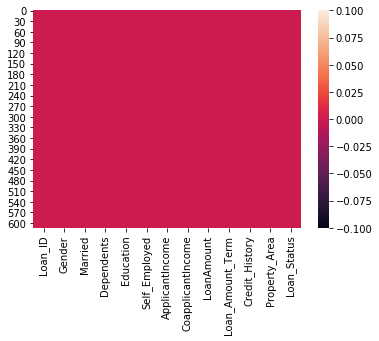

In [83]:
sns.heatmap(df.isnull())

To Check Correlation

In [84]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,0.013265,0.565620,-0.045242,-0.014477
CoapplicantIncome,0.013265,1.000000,0.208377,-0.080960,-0.006840
LoanAmount,0.565620,0.208377,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.080960,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.006840,-0.007738,0.001395,1.000000


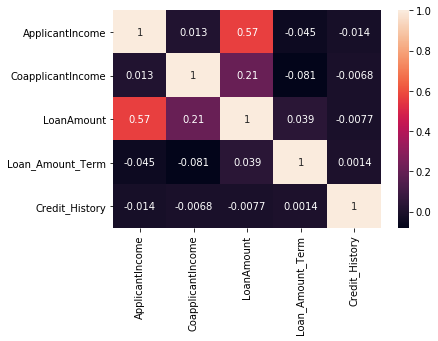

In [85]:
sns.heatmap(df.corr(),annot=True)

UNIVARIATE ANALYSIS

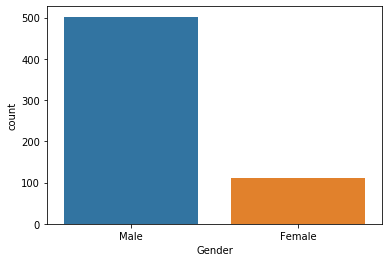

In [86]:
sns.countplot(df['Gender'])

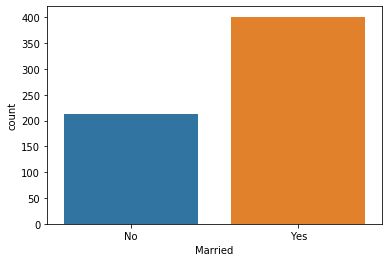

In [87]:
sns.countplot(df['Married'])

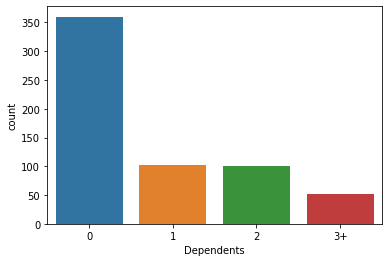

In [88]:
sns.countplot(df['Dependents'])

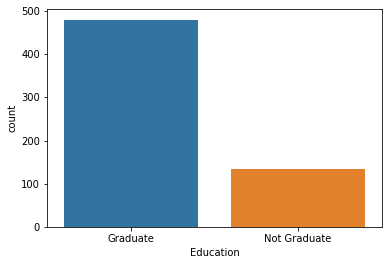

In [89]:
sns.countplot(df['Education'])

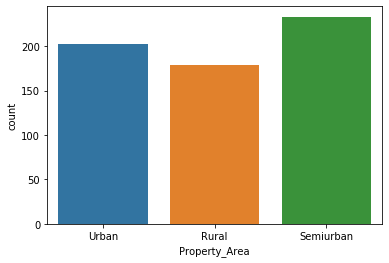

In [90]:
sns.countplot(df['Property_Area'])

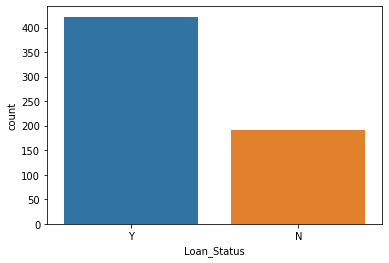

In [91]:
sns.countplot(df['Loan_Status'])

PLOTTING OUTLIERS

In [92]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

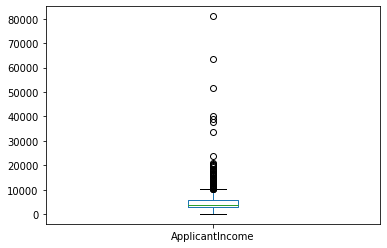

In [93]:
df['ApplicantIncome'].plot.box()

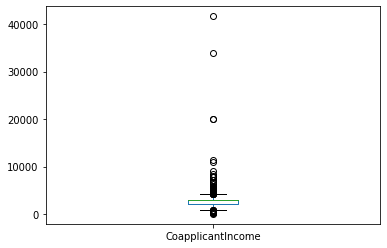

In [94]:
df['CoapplicantIncome'].plot.box()

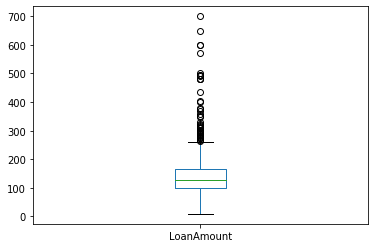

In [95]:
df['LoanAmount'].plot.box()

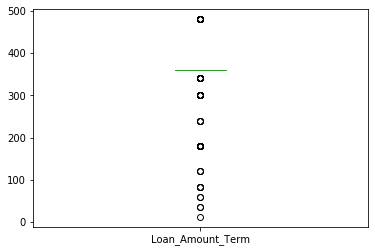

In [96]:
df['Loan_Amount_Term'].plot.box()

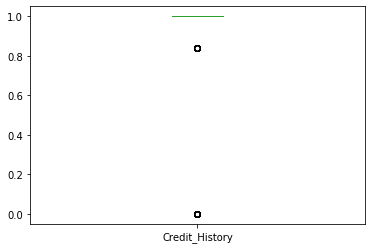

In [97]:
df['Credit_History'].plot.box()

To Check Distribution of Skewness

In [98]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

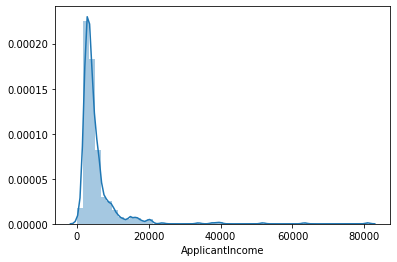

In [99]:
sns.distplot(df['ApplicantIncome'])

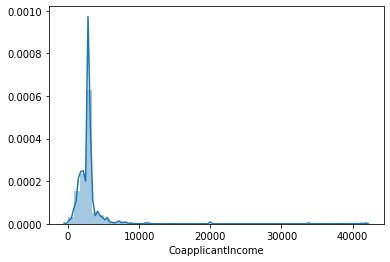

In [100]:
sns.distplot(df['CoapplicantIncome'])

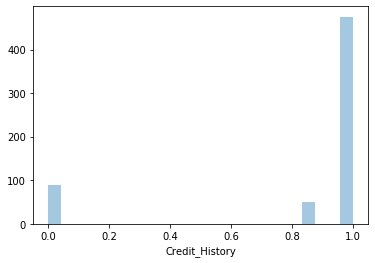

In [101]:
sns.distplot(df['Credit_History'],kde=False)

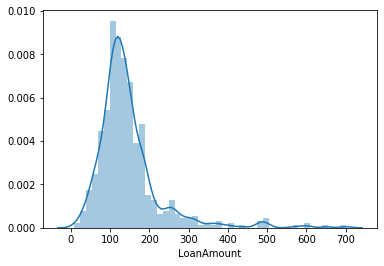

In [102]:
sns.distplot(df['LoanAmount'])

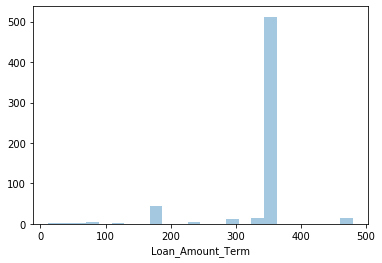

In [103]:
sns.distplot(df['Loan_Amount_Term'],kde=False)

In [104]:
# Drop unused column
df.drop("Loan_ID",axis=1,inplace=True)

In [105]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,2919.193314,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.0,1.0,Rural,N


Label Encoder

In [106]:
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married',"Education",'Self_Employed','Property_Area','Loan_Status','Dependents']
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])


In [107]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,2919.193314,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.000000,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,2919.193314,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.000000,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,2919.193314,141.000000,360.0,1.0,2,1


In [108]:
#Removing OutLiers
from scipy.stats import zscore
z=np.abs(zscore(df))
z


array([[0.47234264, 1.37208932, 0.73780632, ..., 0.45164045, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.45164045, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.45164045, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.45164045, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.45164045, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.41044061, 0.04760721,
        1.48253724]])

In [109]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [110]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [111]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(614, 12)
(577, 12)


# Separating the target and input variable


In [112]:

x=df_new.iloc[:,0:-1]
y=pd.DataFrame(df_new.iloc[:,-1])
print(x.shape)
y.shape

(577, 11)


(577, 1)

In [113]:
# Checking the skewness
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.628998
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
dtype: float64

In [114]:
#using log function to reduce skewness
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.log1p(x[i])

In [115]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.712539
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -2.837554
LoanAmount          -0.697883
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
dtype: float64

In [116]:
#as the skewness needs to be reduced again, we use log function to reduce
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.sqrt(x[i])

In [117]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.490746
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -2.837554
LoanAmount          -0.697883
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
dtype: float64

In [118]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.000000,0.000000,0.000000,8.674197,7.979405,4.993232,360.0,1.0,2
1,1,1,0.832555,0.000000,0.000000,8.430327,7.319202,4.859812,360.0,1.0,0
2,1,1,0.000000,0.000000,0.832555,8.006701,7.979405,4.204693,360.0,1.0,2
3,1,1,0.000000,0.832555,0.000000,7.857094,7.765993,4.795791,360.0,1.0,2
4,1,0,0.000000,0.000000,0.000000,8.699681,7.979405,4.955827,360.0,1.0,2


In [119]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.477137,-1.362511,-0.807657,-0.541961,-0.380580,0.688861,0.351422,0.369286,0.239408,0.456461,1.227472
1,0.477137,0.733939,0.888028,-0.541961,-0.380580,0.249082,-1.015258,0.055093,0.239408,0.456461,-1.306522
2,0.477137,0.733939,-0.807657,-0.541961,2.627567,-0.514859,0.351422,-1.487655,0.239408,0.456461,1.227472
3,0.477137,0.733939,-0.807657,1.845150,-0.380580,-0.784651,-0.090360,-0.095673,0.239408,0.456461,1.227472
4,0.477137,-1.362511,-0.807657,-0.541961,-0.380580,0.734818,0.351422,0.281199,0.239408,0.456461,1.227472


In [120]:
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


# Train-Test Split

In [121]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [122]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(461, 11) (116, 11)
(461, 1) (116, 1)


In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [124]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [125]:
models=[]
models.append(("KNeighborsClassifier",KNN))
models.append(("SVC",SV))
models.append(("LogisticRegression",LR))
models.append(("DecisionTreeClassifier",DT))
models.append(("GaussianNB",GNB))

----------------------- KNeighborsClassifier ----------------------


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_Score = 0.7931034482758621


Cross_Val_Score = 0.7729835082458771


roc_auc_score = 0.6948766603415559


classification_report
               precision    recall  f1-score   support

           0       0.65      0.48      0.56        31
           1       0.83      0.91      0.87        85

    accuracy                           0.79       116
   macro avg       0.74      0.69      0.71       116
weighted avg       0.78      0.79      0.78       116



[[15 16]
 [ 8 77]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



----------------------- SVC ----------------------


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    ma

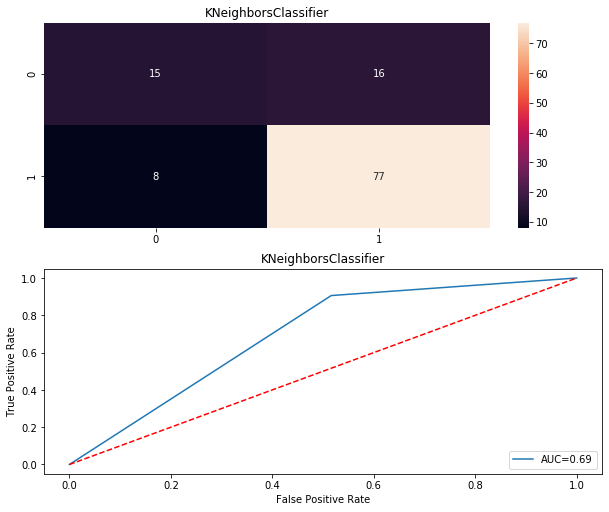

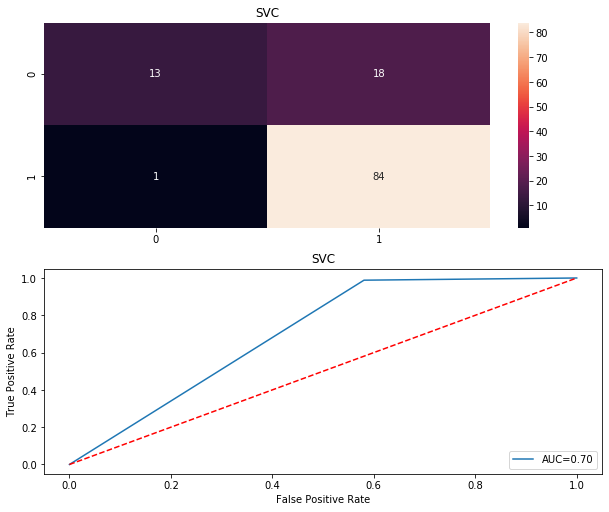

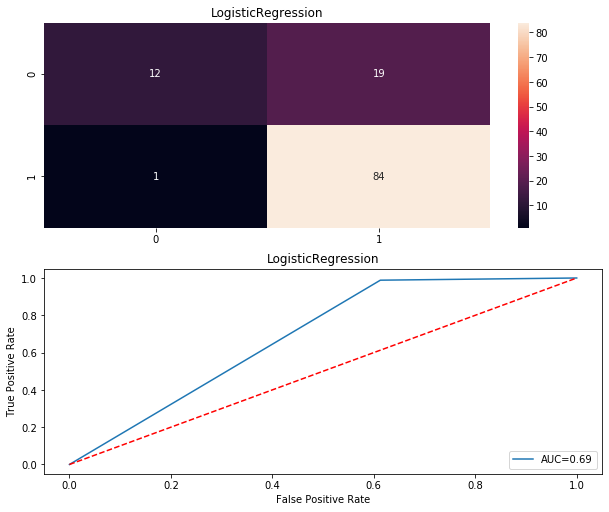

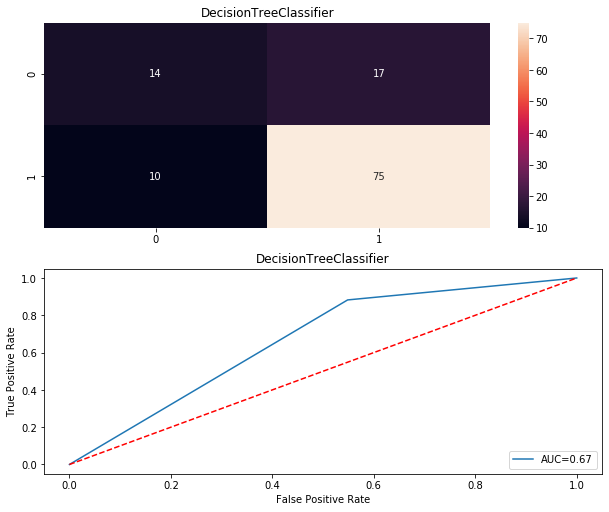

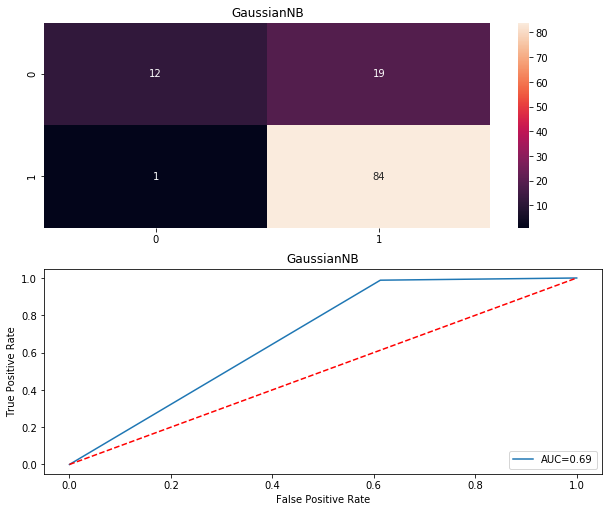

In [126]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print("-----------------------",name,"----------------------")
    print("\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print("\n")
    AS=accuracy_score(y_test,pred)
    print("Accuracy_Score =",AS)
    score.append(AS*100)
    print("\n")
    sc=cross_val_score(model,x,y,cv=5,scoring="accuracy").mean()
    print("Cross_Val_Score =",sc)
    cvs.append(sc*100)
    print("\n")
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score =",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print("classification_report\n",classification_report(y_test,pred))
    print("\n")
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label="AUC=%0.2f"%roc_auc)
    plt.plot([0,1],[0,1],"r--")
    plt.legend(loc="lower right")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    print("\n\n")

In [127]:
result=pd.DataFrame({"Model":Model,"Accuracy_Score":score,"cross_val_score":cvs,"Roc_Auc_Curve":rocscore})
result

,Model,Accuracy_Score,cross_val_score,Roc_Auc_Curve
0,KNeighborsClassifier,79.310345,77.298351,69.487666
1,SVC,83.620690,81.460270,70.379507
2,LogisticRegression,82.758621,81.808096,68.766603
3,DecisionTreeClassifier,76.724138,68.284858,66.698292
4,GaussianNB,82.758621,81.112444,68.766603


Tuning the Model

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
dtc=DecisionTreeClassifier()
grid_param={"criterion":["gini","entropy"]}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.7054122938530734


In [130]:
svc=SVC()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(svc,parameters)
gdsr.fit(x_train,y_train)
gdsr.best_params_

{'C': 1, 'kernel': 'linear'}

In [131]:
svc=SVC(kernel="linear")
score=cross_val_score(svc,x,y,cv=5)
print("Mean_scores",score.mean())
print("Standard_Deviation",score.std())

Mean_scores 0.8180809595202397
Standard_Deviation 0.02649724741088433


In [132]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8189655172413793
[[13 18]
 [ 3 82]]
              precision    recall  f1-score   support

           0       0.81      0.42      0.55        31
           1       0.82      0.96      0.89        85

    accuracy                           0.82       116
   macro avg       0.82      0.69      0.72       116
weighted avg       0.82      0.82      0.80       116



In [133]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=61)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.7844827586206896
[[13 18]
 [ 7 78]]
              precision    recall  f1-score   support

           0       0.65      0.42      0.51        31
           1       0.81      0.92      0.86        85

    accuracy                           0.78       116
   macro avg       0.73      0.67      0.69       116
weighted avg       0.77      0.78      0.77       116



In [134]:
score_ad=cross_val_score(ad,x,y,cv=10,scoring="accuracy")
print("Accuracy_score",score)
print("Mean_scores",score.mean()*100)
print("Standard_Deviation",score.std())


Accuracy_score [0.81034483 0.79310345 0.79130435 0.86086957 0.83478261]
Mean_scores 81.80809595202398
Standard_Deviation 0.02649724741088433


after applying so many model I found that model"SVC" have maximum Accuracy Score, Cross_val_score. so I choose Support Vector Machine (SVC) because it performs very well on this dataset.

In [135]:
from sklearn.model_selection import cross_val_predict
from sklearn.externals import joblib


In [136]:
joblib.dump(SV,"SVC_fraud_model.pkl")

['SVC_fraud_model.pkl']

In [137]:
model=joblib.load("SVC_fraud_model.pkl")
model.predict(x_test)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1])

In [138]:
score=cross_val_predict(model,x,y,cv=5)
score

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,